Q1-Linear Classifier Iris Dataset

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import confusion_matrix

In [175]:
df = pd.DataFrame(pd.read_csv("Iris.csv"))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [176]:
categories = df.Species.unique()
categories

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [177]:
df['Species'] = df['Species'].astype('category').cat.codes
data = np.array(df)
x_train = data[:, 1:5]
y_train = data[:, 5]

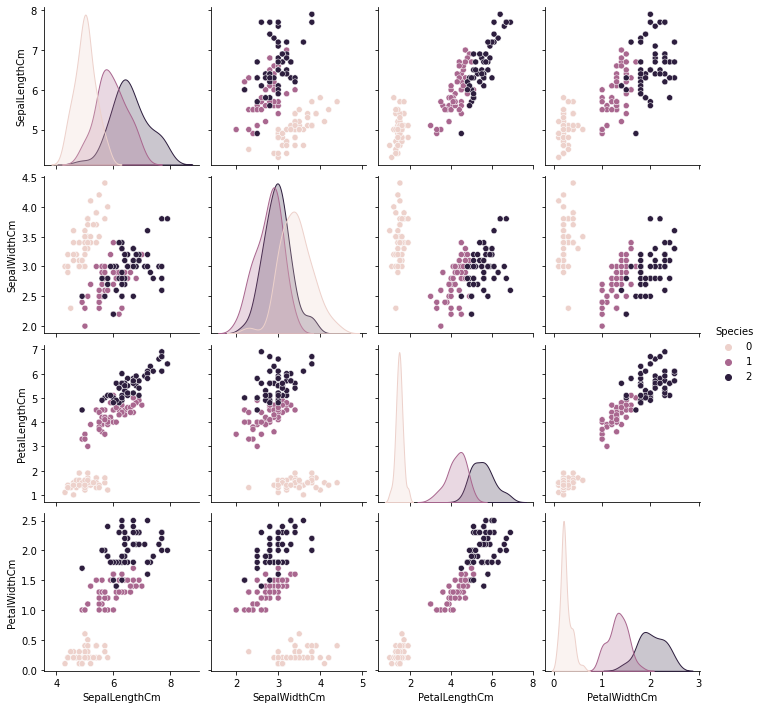

In [178]:
seaborn.pairplot(df.iloc[:,1:6], hue='Species')

In [179]:
def cost(theta, x, y):
    h = x@theta
    m = len(y)
    cost = 1 / m * np.sum((y-h)**2) #Mean Square error
    grad = 1 / m * (y - h)@x
    return cost, grad

def fit(x, y, max_iter=1000, alpha=0.01):
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        
        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta += alpha * grad
            
        thetas.append(theta)
    return thetas, classes, costs

def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [(xi @ theta) for theta in thetas]
    ) for xi in x]
    print(preds)
    return [classes[p] for p in preds]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


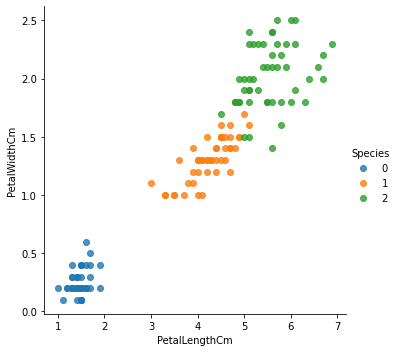

In [180]:
seaborn.lmplot('PetalLengthCm', 'PetalWidthCm', data=df, hue='Species', fit_reg=False)

##### Using PetalLength and PetalWidth

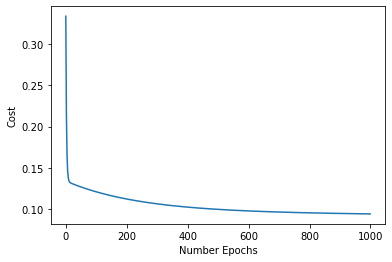

In [181]:
thetas, classes, costs = fit(x_train[:, 2:], y_train)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');

In [182]:
thetas

[array([ 0.96923799, -0.08291144, -0.29704867]),
 array([ 0.07653452,  0.13288242, -0.200515  ]),
 array([-0.25687628,  0.06118743,  0.30488097])]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


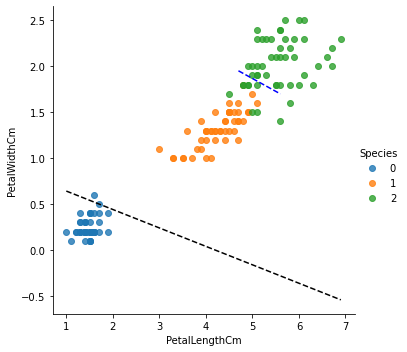

In [183]:
seaborn.lmplot('PetalLengthCm', 'PetalWidthCm', data=df, hue='Species', fit_reg=False)
i = 0
for theta in [thetas[0], thetas[2]]:
    #l = np.array([np.median(x_train[:, 2]), stat.mode(x_train[:, 2])])
    if i == 0:
        l = np.array([x_train[:, 2][50], x_train[:, 2][140]])
        m = -(l * theta[1] + theta[0]) / theta[2]
        plt.plot(l, m, color='b', linestyle="--")
        i+=1
    else:
        j = np.array([x_train[:, 2].min(), x_train[:, 2].max()])
        k = -(j * theta[1] + theta[0]) / theta[2]
        plt.plot(j, k, color='k', linestyle="--")

Here the blue line should seperate classes 0 from 1 and 2. But here we can see that some examples of category of class 1 is predicted as of class 0.

Then the black line should seperate class 2 from 1 and 0. But we can see that some examples in class 1 is predicted as class 2.

In [184]:
y_pred=predict(classes, thetas, x_train[:, 2:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [185]:
confusion_matrix(y_train, y_pred)

array([[50,  0,  0],
       [ 5, 11, 34],
       [ 0,  1, 49]], dtype=int64)

##### Using the whole 4 features

In [186]:
thetas, classes, costs = fit(x_train, y_train)

In [187]:
thetas

[array([ 0.0488104 ,  0.09414689,  0.22493629, -0.22539499, -0.08826653]),
 array([ 0.1258104 ,  0.14567649, -0.22120376,  0.07212162, -0.20927337]),
 array([-0.07459009, -0.11325575,  0.08508432,  0.1324718 ,  0.26467667])]

In [188]:
y_pred=predict(classes, thetas, x_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [189]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[50,  0,  0],
       [ 1, 27, 22],
       [ 0,  2, 48]], dtype=int64)

 Q4-Logistic Regression Iris Dataset

In [190]:
df = pd.DataFrame(pd.read_csv("Iris.csv"))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [191]:
categories = df.Species.unique()
categories

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [192]:
df['Species'] = df['Species'].astype('category').cat.codes
data = np.array(df)
x_train = data[:, 1:5]
y_train = data[:, 5]

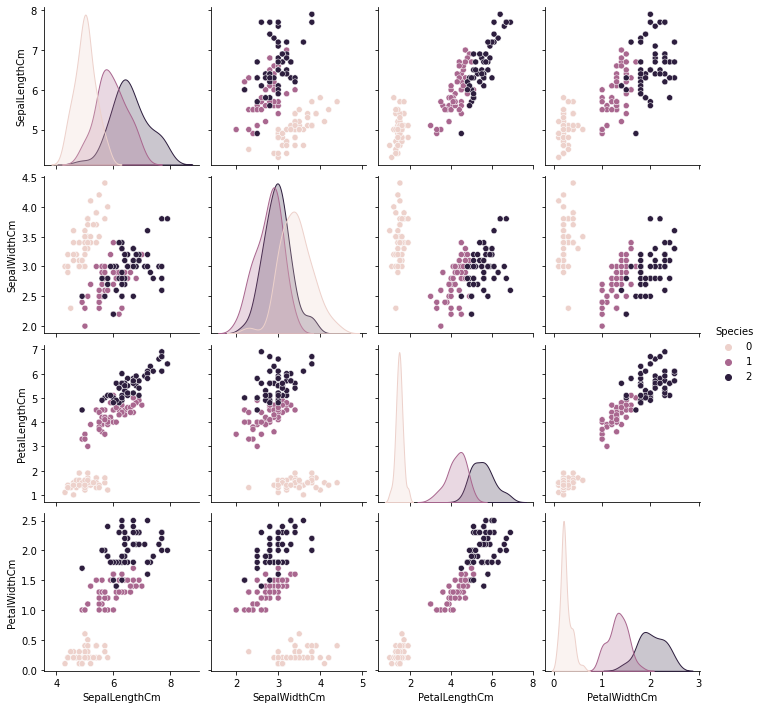

In [193]:
seaborn.pairplot(df.iloc[:,1:6], hue='Species')

Least overlapping points are when petal length and petal width is plotted

Sepal length and petal width plot also has less overlapping points

In [194]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost(theta, x, y):
    h = sigmoid(x @ theta)
    m = len(y)
    cost = 1 / m * np.sum((y-h)**2) #Mean Square error
    grad = 1 / m * ((y - h) *h *(1-h))@x
    return cost, grad

def fit(x, y, max_iter=1000, alpha=0.1):
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        
        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta += alpha * grad
            
        thetas.append(theta)
    return thetas, classes, costs

def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [sigmoid(xi @ theta) for theta in thetas]
    ) for xi in x]
    print(preds)
    return [classes[p] for p in preds]

Text(0, 0.5, 'Petal Width (cm)')

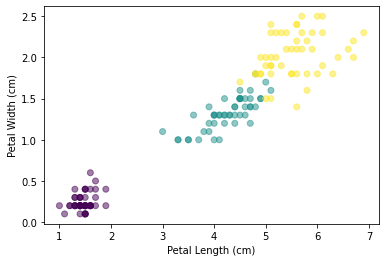

In [195]:
plt.scatter(x_train[:,2], x_train[:, 3], c=y_train, alpha=0.5)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

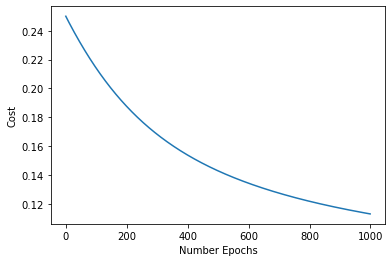

In [196]:
thetas, classes, costs = fit(x_train[:, 2:], y_train)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');


In [197]:
thetas

[array([ 2.01385448, -0.60031037, -0.92992492]),
 array([-0.94943585,  0.16197336, -0.19819362]),
 array([-2.11871845,  0.03053302,  1.24202992])]

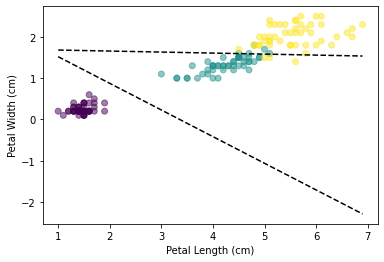

In [198]:
plt.scatter(x_train[:,2], x_train[:, 3], c=y_train, alpha=0.5)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)");
i = 0
for theta in [thetas[0], thetas[2]]:
    j = np.array([x_train[:, 2].min(), x_train[:, 2].max()])
    k = -(j * theta[1] + theta[0]) / theta[2]
    plt.plot(j, k, color='k', linestyle="--")

In [199]:
y_pred=predict(classes, thetas, x_train[:, 2:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [200]:
np.array(y_pred), y_train

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1.,
        2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.

In [201]:
confusion_matrix(y_train, y_pred)

array([[50,  0,  0],
       [ 0, 11, 39],
       [ 0,  0, 50]], dtype=int64)

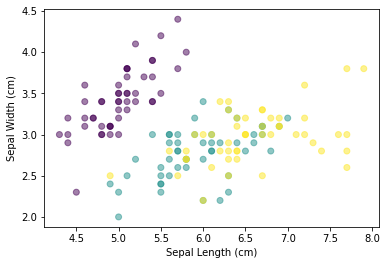

In [202]:
plt.scatter(x_train[:,0], x_train[:, 1], c=y_train, alpha=0.5)
plt.xlabel("Sepal Length (cm)"); plt.ylabel("Sepal Width (cm)");

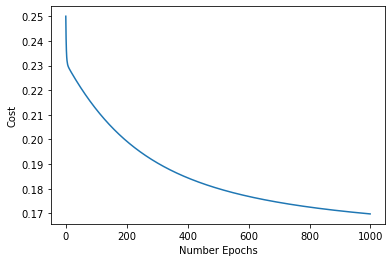

In [203]:
thetas, classes, costs = fit(x_train[:, :2], y_train)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');


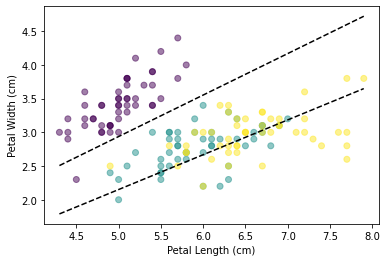

In [204]:
plt.scatter(x_train[:,0], x_train[:, 1], c=y_train, alpha=0.5)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)");
for theta in [thetas[0], thetas[2]]:
    j = np.array([x_train[:, 0].min(), x_train[:, 0].max()])
    k = -(j * theta[1] + theta[0]) / theta[2]
    plt.plot(j, k, color='k', linestyle="--")

Here the points are overlapping making it difficult to classify perfectly. So we have to choose other feature pairs for perfect classification

In [205]:
y_pred=predict(classes, thetas, x_train[:, 2:])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [206]:
confusion_matrix(y_train, y_pred)

array([[ 0, 50,  0],
       [ 0,  4, 46],
       [ 0,  0, 50]], dtype=int64)

##### Using the whole 5 features

In [207]:
thetas, classes, costs = fit(x_train, y_train)

In [208]:
y_pred=predict(classes, thetas, x_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [209]:
confusion_matrix(y_train, y_pred)

array([[50,  0,  0],
       [ 0, 40, 10],
       [ 0,  0, 50]], dtype=int64)

When the features are increased we can see that the model predicts more accurately from the confusion matrix